In [ ]:
#Observable Trends
#1. Average fares are lower in urban locations, presumably due to closer locations and shorter rides.
#2. Although urban cities are only 55% of the market, they account for proportionally greater of their share of Pyber business, in total fares, total rides and number of drivers.
#3. Conversely, rural cities account for less than their proportional share of Pyber business. For example, even though rural fares average higher, rural fares are only 6.8% of total fares in 2016.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data = pd.merge(city_data_df, ride_data_df, on = 'city', how = "outer")

# Display the data table for preview
merged_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

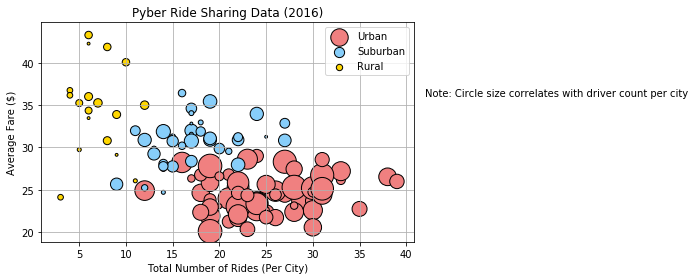

In [3]:
# Obtain the x and y coordinates for each of the three city types
city_count = city_data_df["city"].count()

urban_rides = merged_data.loc[merged_data["type"]== "Urban", :]
urban_city_rides = urban_rides.groupby("city")["ride_id"].count()
avg_urban_cityfare = urban_rides.groupby("city")["fare"].mean()
urban_driver_ct = urban_rides["driver_count"].unique()

sub_rides = merged_data.loc[merged_data["type"]== "Suburban", :]
sub_city_rides = sub_rides.groupby("city")["ride_id"].count()
avg_sub_cityfare = sub_rides.groupby("city")["fare"].mean()
sub_driver_ct = sub_rides["driver_count"].unique()

rural_rides = merged_data.loc[merged_data["type"]== "Rural", :]
rural_city_rides = rural_rides.groupby("city")["ride_id"].count()
avg_rural_cityfare = rural_rides.groupby("city")["fare"].mean()
rural_driver_ct = rural_rides["driver_count"].unique()


# Build the scatter plots for each city types

urban = plt.scatter(urban_city_rides, avg_urban_cityfare, marker="o", facecolors="lightcoral", edgecolors="black", s = urban_driver_ct*8, label = "Urban")
suburban = plt.scatter(sub_city_rides, avg_sub_cityfare, marker="o", facecolors="lightskyblue", edgecolors="black", s = sub_driver_ct*8, label = "Suburban")
rural = plt.scatter(rural_city_rides, avg_rural_cityfare, marker="o", facecolors="gold", edgecolors="black", s = rural_driver_ct*8, label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.tight_layout()

# Create a legend

plt.legend(handles = [urban, suburban, rural], loc = "best")

# Incorporate a text label regarding circle size
plt.text(42, 36, "Note: Circle size correlates with driver count per city")
# Save Figure
plt.savefig("../Images/PyberRideSharingData2016.png")

In [ ]:
#counts
urban_only = merged_data.loc[merged_data["type"]== "Urban", :]
urban_city count

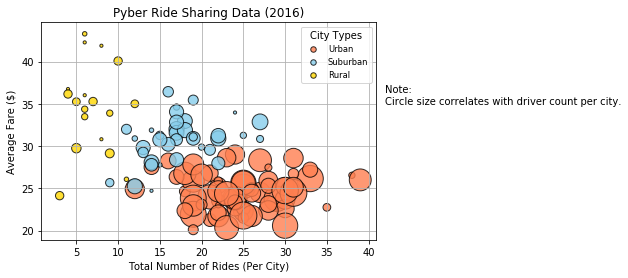

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

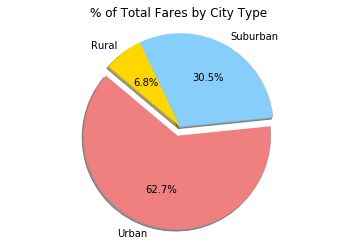

In [30]:
# Calculate Type Percents
total_fares = merged_data["fare"].sum()

total_urban = merged_data.loc[merged_data["type"]== "Urban", :]
urban_fares = total_urban["fare"].sum()
urban_fares_pct = (urban_fares/total_fares)*100

total_sub = merged_data.loc[merged_data["type"]== "Suburban", :]
sub_fares = total_sub["fare"].sum()
sub_fares_pct = (sub_fares/total_fares)*100

total_rural = merged_data.loc[merged_data["type"]== "Rural", :]
rural_fares = total_rural["fare"].sum()
rural_fares_pct = (rural_fares/total_fares)*100


#Build Pie Chart

labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_fares_pct, sub_fares_pct, rural_fares_pct]
colors = ["lightcoral","lightskyblue", "gold"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140) 
plt.axis("equal")
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure

plt.savefig("../Images/FaresByCityType.png")

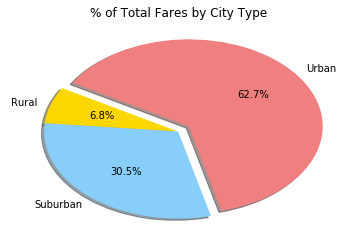

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

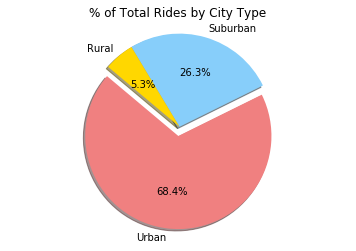

In [29]:
# Calculate Ride Percents
total_fares = merged_data["ride_id"].count()


total_urban = merged_data.loc[merged_data["type"]== "Urban", :]
total_urban_ct = total_urban["ride_id"].count()
total_urban_pct = (total_urban_ct/total_fares)*100

total_sub = merged_data.loc[merged_data["type"]== "Suburban", :]
total_sub_ct = total_sub["ride_id"].count()
total_sub_pct = (total_sub_ct/total_fares)*100

total_rural = merged_data.loc[merged_data["type"]== "Rural", :]
total_rural_ct = total_rural["ride_id"].count()
total_rural_pct = (total_rural_ct/total_fares)*100

# Build Pie Chart

labels = ["Urban", "Suburban", "Rural"]
sizes = [total_urban_pct, total_sub_pct, total_rural_pct]
colors = ["lightcoral","lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140) 
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("../Images/RidesByCityType.png")


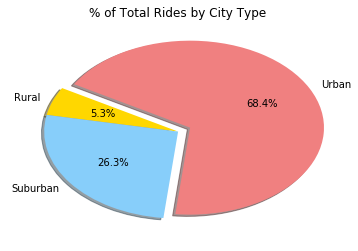

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

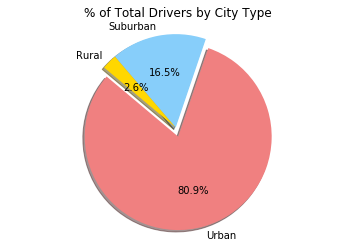

In [48]:
# Calculate Driver Percents
total_drivers = city_data_df["driver_count"].sum()

total_urban = city_data_df.loc[city_data_df["type"]== "Urban", :]
urban_ct = total_urban["driver_count"].sum()
urban_pct = (urban_ct/total_drivers)*100

total_sub = city_data_df.loc[city_data_df["type"]== "Suburban", :]
sub_ct = total_sub["driver_count"].sum()
sub_pct = (sub_ct/total_drivers)*100

total_rural = city_data_df.loc[city_data_df["type"]== "Rural", :]
rural_ct = total_rural["driver_count"].sum()
rural_pct = (rural_ct/total_drivers)*100

# Build Pie Charts

labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_pct, sub_pct, rural_pct]
colors = ["lightcoral","lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140) 
plt.axis("equal")
plt.title("% of Total Drivers by City Type")


# Save Figure

plt.savefig("../Images/DriversByCityType.png")


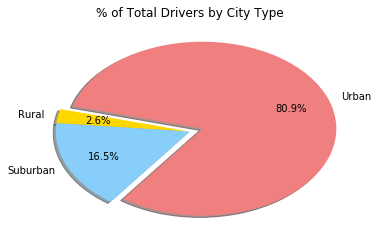

In [6]:
# Show Figure
plt.show()